### Data Preprocessing:


In [1]:
# Import 
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [2]:
# Load the dataset
df = pd.read_csv('dataset_label_3d.csv')
df

,Stance,x1,y1,z1,x2,y2,z2,x3,y3,z3,...,z30,x31,y31,z31,x32,y32,z32,x33,y33,z33
0,Tame,0.017081,-0.615436,-0.354976,0.023743,-0.654147,-0.339717,0.024248,-0.654553,-0.339124,...,0.106091,-0.346709,0.640854,0.199478,0.749615,0.628756,-0.003005,-0.395227,0.698403,0.091981
1,Bow-Arrow,-0.086060,-0.623787,-0.128311,-0.065765,-0.661279,-0.141791,-0.065349,-0.661530,-0.141336,...,0.060965,-0.305673,0.660359,0.016075,0.517297,0.704586,-0.043896,-0.417004,0.705426,-0.066573
2,Bow-Arrow,-0.119147,-0.625371,-0.192470,-0.105032,-0.663589,-0.195877,-0.104575,-0.663897,-0.195225,...,0.076785,-0.389150,0.561384,-0.020714,0.688207,0.559055,-0.004220,-0.502432,0.624779,-0.083266
3,Bow-Arrow,0.237772,-0.644477,-0.047300,0.205139,-0.678212,-0.039447,0.205111,-0.678422,-0.038493,...,0.173230,-0.679933,0.366953,0.149973,0.549153,0.338803,0.129619,-0.653754,0.415769,0.063290
4,Bow-Arrow,-0.268363,-0.579284,-0.064051,-0.258161,-0.616762,-0.085149,-0.257637,-0.617164,-0.084190,...,-0.137475,-0.406547,0.456304,0.094538,0.814391,0.457685,-0.200070,-0.531497,0.519960,0.074109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Sitting,-0.218417,-0.398879,-0.278771,-0.226623,-0.438285,-0.295347,-0.226295,-0.438411,-0.294299,...,0.030677,0.134346,0.161952,-0.131041,-0.144058,0.082499,-0.012108,0.187589,0.234613,-0.178670
57,Sitting,0.316582,-0.519733,-0.129732,0.307712,-0.560967,-0.112591,0.308066,-0.561479,-0.111612,...,0.172896,0.437231,0.248441,-0.038380,-0.131155,0.282984,0.174706,0.571180,0.271073,-0.073487
58,Sitting,-0.357404,-0.526845,-0.045267,-0.350911,-0.569855,-0.066601,-0.350643,-0.569925,-0.065803,...,-0.021521,0.241397,0.337981,0.231610,-0.458671,0.435252,-0.028594,0.233322,0.420652,0.243162
59,Taijiquan,0.037122,-0.612349,-0.359622,0.047189,-0.651266,-0.342880,0.047540,-0.651710,-0.342385,...,0.235025,-0.215589,0.729720,0.137203,0.291514,0.796439,0.116467,-0.239091,0.796968,0.010351


In [3]:
# Check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Stance  61 non-null     object 
 1   x1      61 non-null     float64
 2   y1      61 non-null     float64
 3   z1      61 non-null     float64
 4   x2      61 non-null     float64
 5   y2      61 non-null     float64
 6   z2      61 non-null     float64
 7   x3      61 non-null     float64
 8   y3      61 non-null     float64
 9   z3      61 non-null     float64
 10  x4      61 non-null     float64
 11  y4      61 non-null     float64
 12  z4      61 non-null     float64
 13  x5      61 non-null     float64
 14  y5      61 non-null     float64
 15  z5      61 non-null     float64
 16  x6      61 non-null     float64
 17  y6      61 non-null     float64
 18  z6      61 non-null     float64
 19  x7      61 non-null     float64
 20  y7      61 non-null     float64
 21  z7      61 non-null     float64
 22  x8 

In [4]:
# Remove missing values
df.dropna(inplace=True)

In [5]:
# Check the null values
df.isnull().sum()

Stance    0
x1        0
y1        0
z1        0
x2        0
         ..
y32       0
z32       0
x33       0
y33       0
z33       0
Length: 100, dtype: int64

### Calculate Angle Keypoints

In [6]:
# Keypoints for each stance
angle_keypoints = [
    (1, 5, 8),  # Horse Stance keypoints
    (4, 5, 6),  # Bow-Arrow Stance keypoints
    (5, 9, 12),  # Sitting on Crossed Legs Stance keypoints
    (5, 21, 24),  # Four-Six Stance keypoints
    (5, 11, 14),  # Tame the Tiger Stance keypoints
    (3, 8, 12),  # False Stance keypoints
    (23, 24, 25),  # Golden Rooster Stance keypoints
    (5, 14, 17),  # Squat Stance keypoints
]

# Create a function to calculate angles based on keypoints
def calculate_angles(row, keypoints):
    angles = {}
    for i, keypoint_triplet in enumerate(keypoints):
        keypoint_1, keypoint_2, keypoint_3 = keypoint_triplet
        x1, y1, z1 = row[f'x{keypoint_1}'], row[f'y{keypoint_1}'], row[f'z{keypoint_1}']
        x2, y2, z2 = row[f'x{keypoint_2}'], row[f'y{keypoint_2}'], row[f'z{keypoint_2}']
        x3, y3, z3 = row[f'x{keypoint_3}'], row[f'y{keypoint_3}'], row[f'z{keypoint_3}']

        ba = np.array([x1 - x2, y1 - y2, z1 - z2])
        bc = np.array([x3 - x2, y3 - y2, z3 - z2])

        cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
        angle = math.degrees(np.arccos(cosine_angle))

        if angle > 180.0:
            angle = 360 - angle
        
        stance_name = f'Stance {i + 1}'
        angles[stance_name] = angle
    
    return angles

In [7]:
# Calculate angles for each row in the dataset based on the angle_keypoints
angle_features = df.apply(calculate_angles, args=(angle_keypoints,), axis=1)

# Convert the angle_features (Series) to a DataFrame
angle_features_df = pd.DataFrame(angle_features.tolist())

# Rename the columns to make them more meaningful (e.g., Angle_1, Angle_2, ...)
angle_features_df.columns = [f'Angle_{i+1}' for i in range(angle_features_df.shape[1])]

# Concatenate the angle features with your original dataset
df = pd.concat([df, angle_features_df], axis=1)


In [8]:
df

,Stance,x1,y1,z1,x2,y2,z2,x3,y3,z3,...,y33,z33,Angle_1,Angle_2,Angle_3,Angle_4,Angle_5,Angle_6,Angle_7,Angle_8
0,Tame,0.017081,-0.615436,-0.354976,0.023743,-0.654147,-0.339717,0.024248,-0.654553,-0.339124,...,0.698403,0.091981,82.707126,72.408218,81.960241,83.019647,150.295402,124.565915,34.397046,74.322061
1,Bow-Arrow,-0.086060,-0.623787,-0.128311,-0.065765,-0.661279,-0.141791,-0.065349,-0.661530,-0.141336,...,0.705426,-0.066573,92.621954,42.317220,86.439816,103.247575,142.285736,124.207511,29.765276,75.647379
2,Bow-Arrow,-0.119147,-0.625371,-0.192470,-0.105032,-0.663589,-0.195877,-0.104575,-0.663897,-0.195225,...,0.624779,-0.083266,81.512089,41.212651,74.258496,94.192567,148.828433,110.173873,24.151011,81.569812
3,Bow-Arrow,0.237772,-0.644477,-0.047300,0.205139,-0.678212,-0.039447,0.205111,-0.678422,-0.038493,...,0.415769,0.063290,95.467362,121.190815,80.509514,52.100395,147.154740,117.705861,99.390331,38.602086
4,Bow-Arrow,-0.268363,-0.579284,-0.064051,-0.258161,-0.616762,-0.085149,-0.257637,-0.617164,-0.084190,...,0.519960,0.074109,90.500958,47.012815,84.180066,88.206790,147.020091,126.156469,19.846969,88.029119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Sitting,-0.218417,-0.398879,-0.278771,-0.226623,-0.438285,-0.295347,-0.226295,-0.438411,-0.294299,...,0.234613,-0.178670,76.435666,35.770438,96.573721,43.670204,136.719215,132.613598,26.571928,52.511310
57,Sitting,0.316582,-0.519733,-0.129732,0.307712,-0.560967,-0.112591,0.308066,-0.561479,-0.111612,...,0.271073,-0.073487,95.582363,107.785526,67.731928,87.996182,106.292622,102.757621,30.679485,50.072236
58,Sitting,-0.357404,-0.526845,-0.045267,-0.350911,-0.569855,-0.066601,-0.350643,-0.569925,-0.065803,...,0.420652,0.243162,91.747385,47.440659,97.893534,52.190621,133.752036,131.598795,59.274166,30.816142
59,Taijiquan,0.037122,-0.612349,-0.359622,0.047189,-0.651266,-0.342880,0.047540,-0.651710,-0.342385,...,0.796968,0.010351,86.005879,78.292916,83.036394,70.761568,157.612865,124.938059,39.239125,92.010316


In [9]:
# Save the dataset to a CSV file
df.to_csv('taijiquan_dataset.csv', index=False)

In [10]:
dataset = pd.read_csv('taijiquan_dataset.csv')
dataset

,Stance,x1,y1,z1,x2,y2,z2,x3,y3,z3,...,y33,z33,Angle_1,Angle_2,Angle_3,Angle_4,Angle_5,Angle_6,Angle_7,Angle_8
0,Tame,0.017081,-0.615436,-0.354976,0.023743,-0.654147,-0.339717,0.024248,-0.654553,-0.339124,...,0.698403,0.091981,82.707126,72.408218,81.960241,83.019647,150.295402,124.565915,34.397046,74.322061
1,Bow-Arrow,-0.086060,-0.623787,-0.128311,-0.065765,-0.661279,-0.141791,-0.065349,-0.661530,-0.141336,...,0.705426,-0.066573,92.621954,42.317220,86.439816,103.247575,142.285736,124.207511,29.765276,75.647379
2,Bow-Arrow,-0.119147,-0.625371,-0.192470,-0.105032,-0.663589,-0.195877,-0.104575,-0.663897,-0.195225,...,0.624779,-0.083266,81.512089,41.212651,74.258496,94.192567,148.828433,110.173873,24.151011,81.569812
3,Bow-Arrow,0.237772,-0.644477,-0.047300,0.205139,-0.678212,-0.039447,0.205111,-0.678422,-0.038493,...,0.415769,0.063290,95.467362,121.190815,80.509514,52.100395,147.154740,117.705861,99.390331,38.602086
4,Bow-Arrow,-0.268363,-0.579284,-0.064051,-0.258161,-0.616762,-0.085149,-0.257637,-0.617164,-0.084190,...,0.519960,0.074109,90.500958,47.012815,84.180066,88.206790,147.020091,126.156469,19.846969,88.029119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Sitting,-0.218417,-0.398879,-0.278771,-0.226623,-0.438285,-0.295347,-0.226295,-0.438411,-0.294299,...,0.234613,-0.178670,76.435666,35.770438,96.573721,43.670204,136.719215,132.613598,26.571928,52.511310
57,Sitting,0.316582,-0.519733,-0.129732,0.307712,-0.560967,-0.112591,0.308066,-0.561479,-0.111612,...,0.271073,-0.073487,95.582363,107.785526,67.731928,87.996182,106.292622,102.757621,30.679485,50.072236
58,Sitting,-0.357404,-0.526845,-0.045267,-0.350911,-0.569855,-0.066601,-0.350643,-0.569925,-0.065803,...,0.420652,0.243162,91.747385,47.440659,97.893534,52.190621,133.752036,131.598795,59.274166,30.816142
59,Taijiquan,0.037122,-0.612349,-0.359622,0.047189,-0.651266,-0.342880,0.047540,-0.651710,-0.342385,...,0.796968,0.010351,86.005879,78.292916,83.036394,70.761568,157.612865,124.938059,39.239125,92.010316


In [11]:
# Check if there are any missing values in the dataset
missing_values = dataset.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Stance     0
x1         0
y1         0
z1         0
x2         0
          ..
Angle_4    0
Angle_5    0
Angle_6    0
Angle_7    0
Angle_8    0
Length: 108, dtype: int64


In [12]:
# Remove rows with missing values
dataset.dropna(inplace=True)

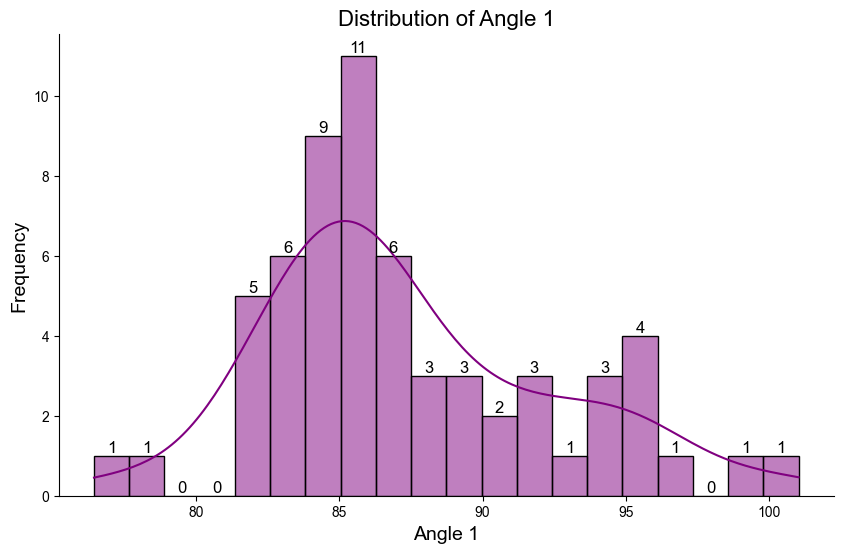

In [13]:
# Creating a histogram
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the histogram
sns.histplot(df['Angle_1'], bins=20, kde=True, color='purple')

plt.xlabel('Angle 1', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Angle 1', fontsize=16)

# Annotate each bin with the number of data points
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height())}',
                ha='center', va='bottom', fontsize=12, color='black')

# Customize the style
sns.set_style("whitegrid")  # Use a white grid background
sns.despine()

# Show the plot
plt.show()


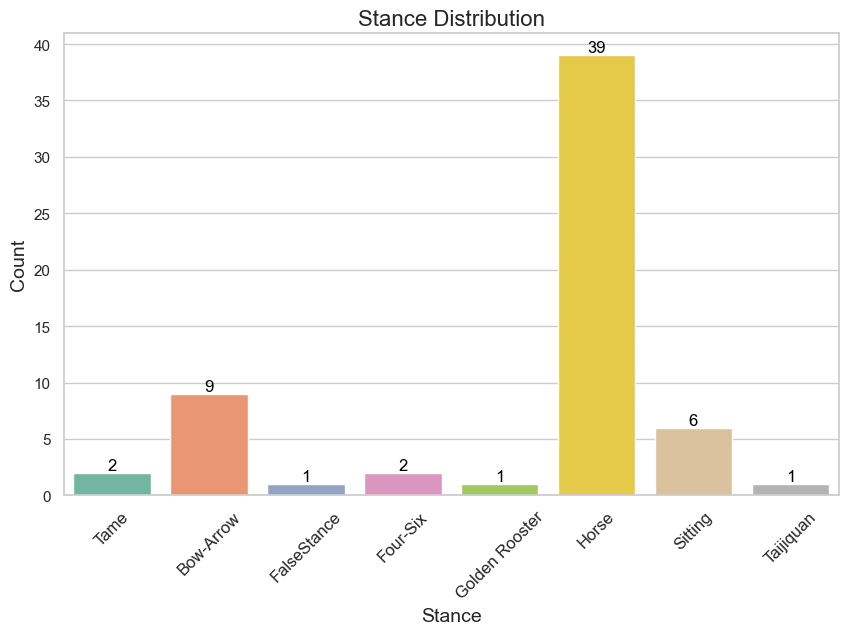

In [14]:
# Creating a bar chart with Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size

# Use Seaborn's countplot with hue to specify x and legend=False
sns.set(style="whitegrid")  # Use a white grid background
ax = sns.countplot(x="Stance", hue="Stance", data=df, palette="Set2", legend=False)

plt.xlabel('Stance', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Stance Distribution', fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

# Show the plot
plt.show()

In [15]:
# Split the dataset into features (angles) and labels (stances)
# Assuming that your 'Stance' column contains the stance labels
#features = dataset.drop(columns=['Stance', 'Angle_1', 'Angle_2', 'Angle_3', 'Angle_4', 'Angle_5', 'Angle_6', 'Angle_7', 'Angle_8'])

features = dataset.drop(columns=['Stance'])
labels = dataset['Stance']

#features = dataset.drop(columns=['Stance', 'Angle_1', 'Angle_2', ..., 'Angle_8'])
#labels = dataset['Stance']


In [16]:
# Encode the labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)


### Data Splitting:


In [17]:
dataset['Stance'].unique()

array(['Tame', 'Bow-Arrow', 'FalseStance', 'Four-Six', 'Golden Rooster',
       'Horse', 'Sitting', 'Taijiquan'], dtype=object)

In [18]:
# Split the dataset into training, validation, and testing sets
# X_train and y_train_encoded are the training features and labels.
# X_val and y_val_encoded are your validation features and labels
# X_test and y_test_encoded are your testing features and labels
X_train, X_temp, y_train_encoded, y_temp = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)
X_val, X_test, y_val_encoded, y_test_encoded = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [19]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Number of classes (replace with the actual number of classes)
num_classes = len(label_encoder.classes_)

# FNN model using Keras

In [21]:
# Initialize a Sequential model
model = Sequential()
# Add input layer with input_dim specifying the number of features
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
# Add hidden layer
model.add(Dense(32, activation='relu'))
# Add output layer with 'softmax' activation for multi-class classification
model.add(Dense(num_classes, activation='softmax'))

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [23]:
# One-hot encode the labels
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_val_one_hot = to_categorical(y_val_encoded, num_classes=num_classes)

In [24]:
# Train the model
history = model.fit(X_train_scaled, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val_one_hot))

Epoch 1/10
2/2 [==============================] - 5s 524ms/step - loss: 2.8384 - accuracy: 0.0000e+00 - val_loss: 2.1495 - val_accuracy: 0.1667
Epoch 2/10
2/2 [==============================] - 0s 48ms/step - loss: 2.5203 - accuracy: 0.0000e+00 - val_loss: 1.9807 - val_accuracy: 0.1667
Epoch 3/10
2/2 [==============================] - 0s 48ms/step - loss: 2.2379 - accuracy: 0.0208 - val_loss: 1.8294 - val_accuracy: 0.1667
Epoch 4/10
2/2 [==============================] - 0s 49ms/step - loss: 1.9991 - accuracy: 0.1042 - val_loss: 1.6851 - val_accuracy: 0.1667
Epoch 5/10
2/2 [==============================] - 0s 53ms/step - loss: 1.7980 - accuracy: 0.2917 - val_loss: 1.5445 - val_accuracy: 0.5000
Epoch 6/10
2/2 [==============================] - 0s 60ms/step - loss: 1.6179 - accuracy: 0.4583 - val_loss: 1.4063 - val_accuracy: 0.6667
Epoch 7/10
2/2 [==============================] - 0s 59ms/step - loss: 1.4636 - accuracy: 0.6458 - val_loss: 1.2801 - val_accuracy: 0.8333
Epoch 8/10
2/2 [==

In [25]:
# Evaluate the model on the test set
X_test_scaled = scaler.transform(X_test)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_one_hot)

print(f'Test accuracy: {test_accuracy * 100:.2f}%')

1/1 [==============================] - 0s 38ms/step - loss: 2.1279 - accuracy: 0.4286
Test accuracy: 42.86%
